# LIBRARY

In [ ]:
import pandas as pd  # Untuk manipulasi dan analisis data tabular
import numpy as np  # Untuk operasi matematika dan manipulasi array
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi train dan test set
from sklearn.linear_model import LinearRegression  # Untuk membuat model regresi linear
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Untuk evaluasi performa model regresi
import seaborn as sns  # Untuk visualisasi data yang informatif
import matplotlib.pyplot as plt  # Untuk membuat plot grafis
from scipy import stats # Deskripsi Statistika deskriptif
import statsmodels.api as sm  # Untuk analisis statistik yang lebih lanjut
import math
from sklearn.preprocessing import StandardScaler  # Untuk penskalaan fitur dalam preprocessing data
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Untuk mengevaluasi multi-collinearity

# IMPORT & DATA PRE PROCESSING

## Import Dataset

In [ ]:
data = pd.read_csv('/content/Real estate.csv')

In [ ]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## New Dataset

In [ ]:
df = data.drop('No', axis=1)

In [ ]:
df.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


## Data Cleaning

In [ ]:
# Mengubah nama kolom
df.columns = ['TransactionDate', 'HouseAge', 'DistanceToMRT', 'NumberOfStores', 'Latitude', 'Longtitude', 'HousePriceOfUnitArea']

## Dataset Checking

In [ ]:
df.head(10)

,TransactionDate,HouseAge,DistanceToMRT,NumberOfStores,Latitude,Longtitude,HousePriceOfUnitArea
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [ ]:
df.shape

(414, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionDate       414 non-null    float64
 1   HouseAge              414 non-null    float64
 2   DistanceToMRT         414 non-null    float64
 3   NumberOfStores        414 non-null    int64  
 4   Latitude              414 non-null    float64
 5   Longtitude            414 non-null    float64
 6   HousePriceOfUnitArea  414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [ ]:
df.isna().sum()

TransactionDate         0
HouseAge                0
DistanceToMRT           0
NumberOfStores          0
Latitude                0
Longtitude              0
HousePriceOfUnitArea    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df_new =  df.drop('TransactionDate', axis=1)

## Statistika Deskriptif

In [ ]:
df_new.describe()

,HouseAge,DistanceToMRT,NumberOfStores,Latitude,Longtitude,HousePriceOfUnitArea
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
# Statistik Deskriptif Dasar
print("Statistik Deskriptif Dasar:")
print(df_new.describe())

# Mean
mean_values = df_new.mean()
print("\nMean:")
print(mean_values)

# Median
median_values = df_new.median()
print("\nMedian:")
print(median_values)

# Mode
mode_values = df_new.mode().iloc[0]
print("\nMode:")
print(mode_values)

# Standard Deviation
std_values = df_new.std()
print("\nStandard Deviation:")
print(std_values)

# Variance
variance_values = df_new.var()
print("\nVariance:")
print(variance_values)

# Skewness
skewness_values = df_new.skew()
print("\nSkewness:")
print(skewness_values)

# Kurtosis
kurtosis_values = df_new.kurtosis()
print("\nKurtosis:")
print(kurtosis_values)

# Quartiles
quartiles = df_new.quantile([0.25, 0.5, 0.75])
print("\nQuartiles:")
print(quartiles)



Statistik Deskriptif Dasar:
         HouseAge  DistanceToMRT  NumberOfStores    Latitude  Longtitude  \
count  414.000000     414.000000      414.000000  414.000000  414.000000   
mean    17.712560    1083.885689        4.094203   24.969030  121.533361   
std     11.392485    1262.109595        2.945562    0.012410    0.015347   
min      0.000000      23.382840        0.000000   24.932070  121.473530   
25%      9.025000     289.324800        1.000000   24.963000  121.528085   
50%     16.100000     492.231300        4.000000   24.971100  121.538630   
75%     28.150000    1454.279000        6.000000   24.977455  121.543305   
max     43.800000    6488.021000       10.000000   25.014590  121.566270   

       HousePriceOfUnitArea  
count            414.000000  
mean              37.980193  
std               13.606488  
min                7.600000  
25%               27.700000  
50%               38.450000  
75%               46.600000  
max              117.500000  

Mean:
HouseAge  

# VISUALISASI DATA


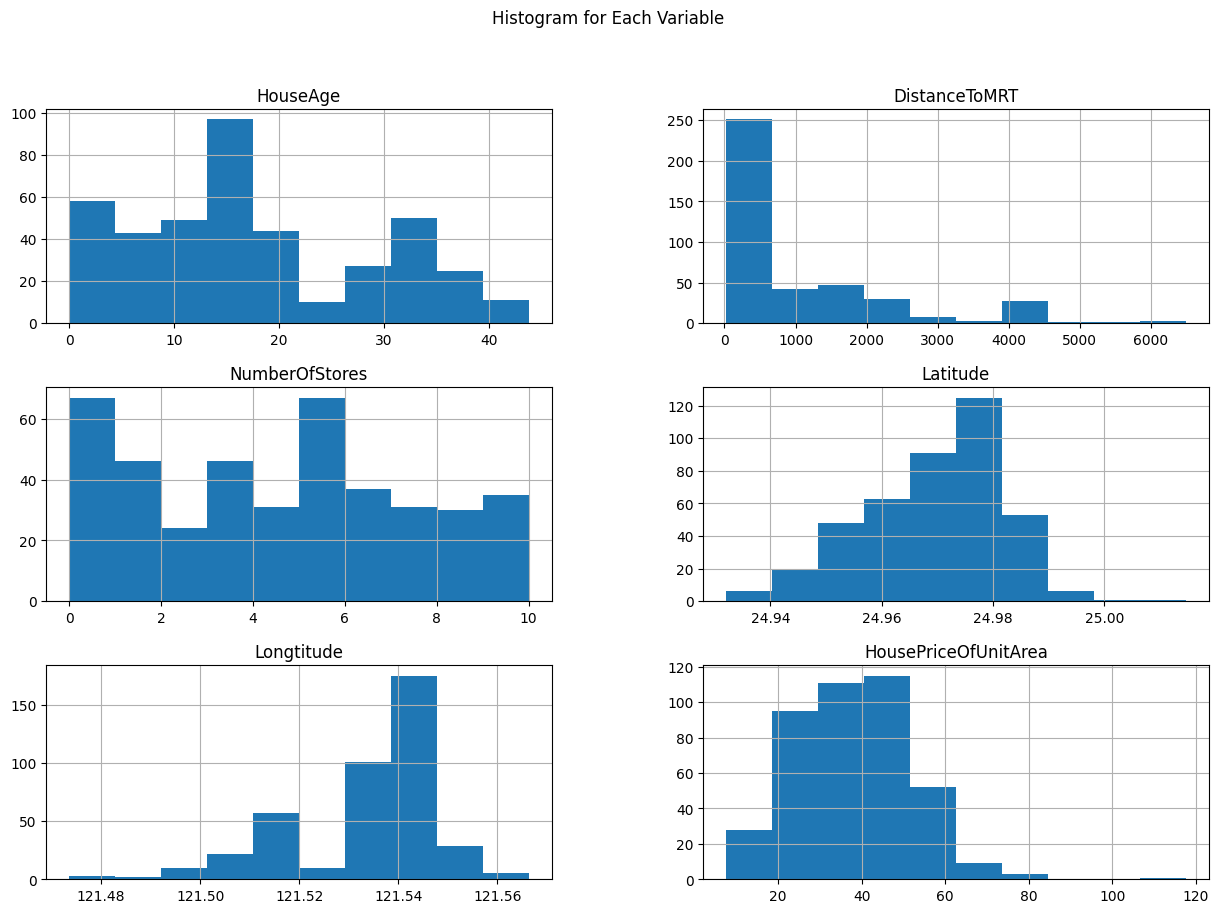

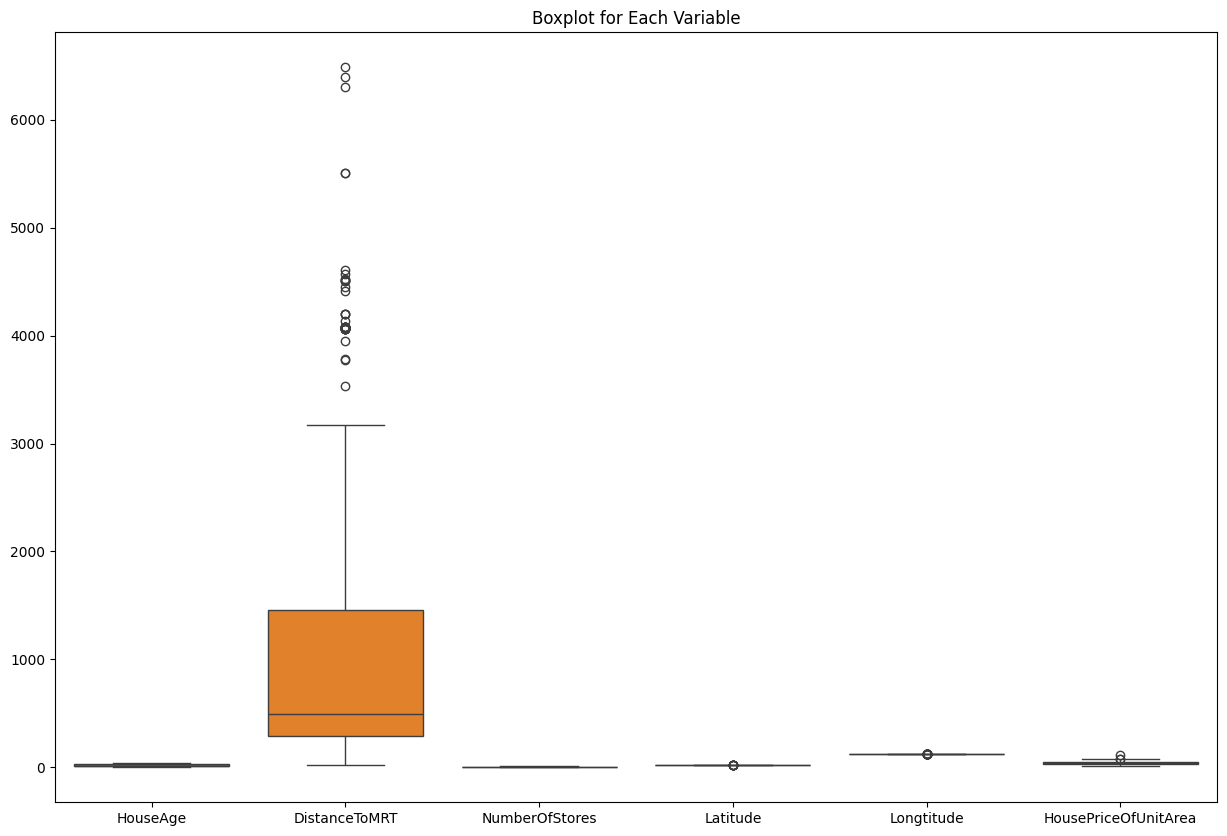

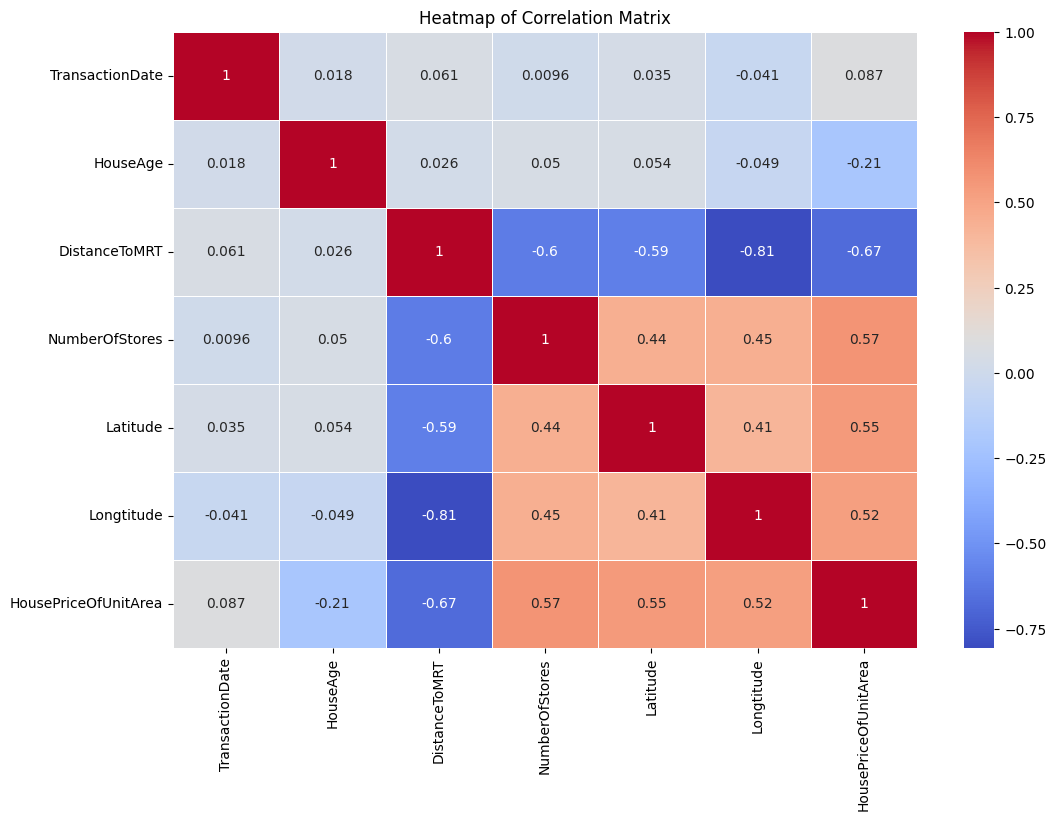

In [ ]:
# Visualisasi
# Histogram
df_new.hist(bins=10, figsize=(15, 10))
plt.suptitle('Histogram for Each Variable')
plt.show()

# Boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_new)
plt.title('Boxplot for Each Variable')
plt.show()


# Heatmap of Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

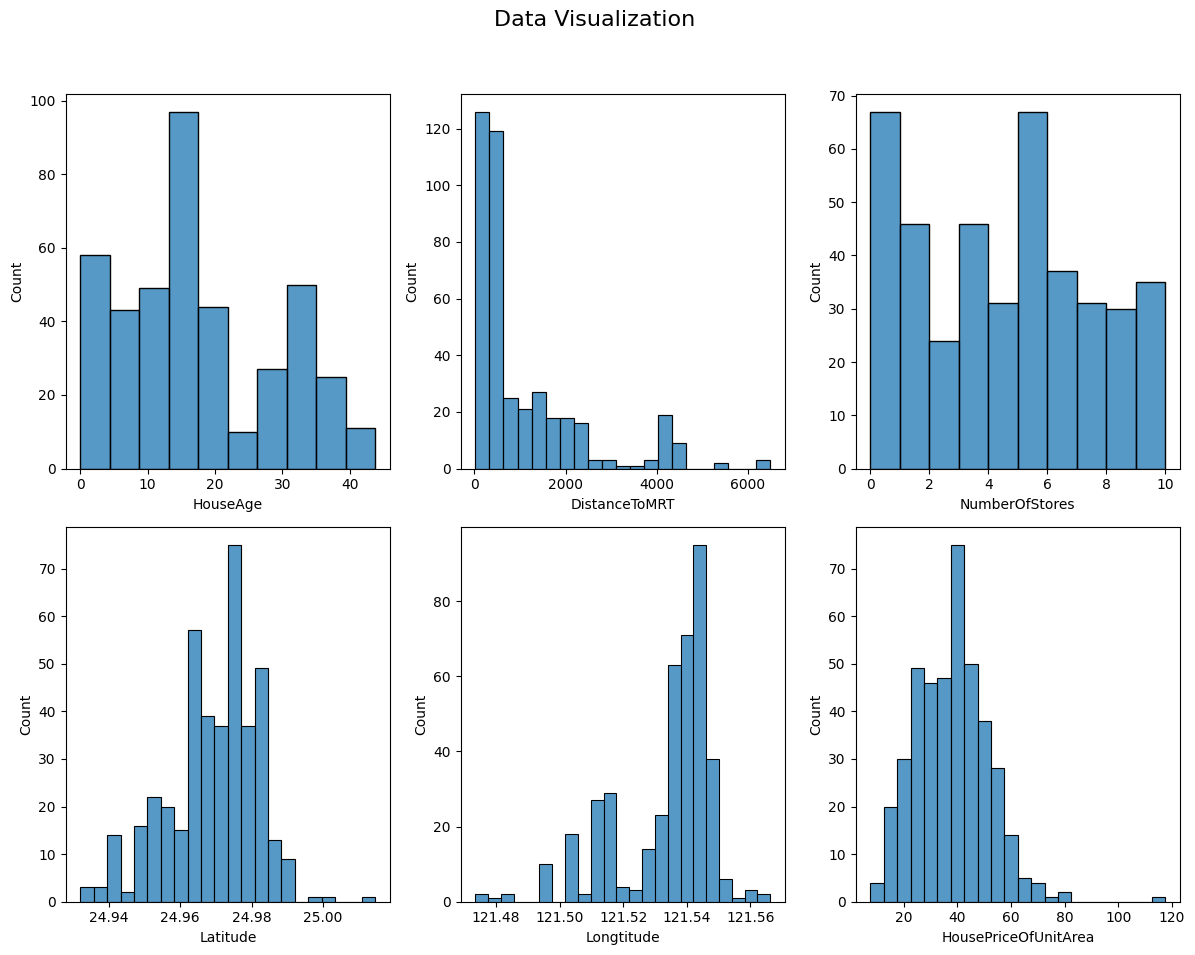

In [ ]:
# Visualization of each column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
fig.suptitle('Data Visualization', fontsize=16)

sns.histplot(data=df, x='HouseAge', ax=axes[0, 0])
sns.histplot(data=df, x='DistanceToMRT', ax=axes[0, 1])
sns.histplot(data=df, x='NumberOfStores', ax=axes[0, 2])

sns.histplot(data=df, x='Latitude', ax=axes[1, 0])
sns.histplot(data=df, x='Longtitude', ax=axes[1, 1])
sns.histplot(data=df, x='HousePriceOfUnitArea', ax=axes[1, 2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

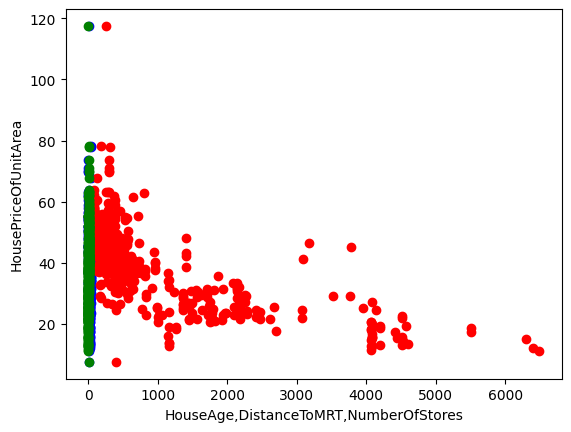

In [ ]:
# VISUALISASI HUBUNGAN ANTARA VARIABEL DEPENDEN DAN INDEPENDEN MENGGUNAKAN SCATTER
plt.scatter(df.HouseAge, df.HousePriceOfUnitArea, color='blue')
plt.scatter(df.DistanceToMRT, df.HousePriceOfUnitArea,color='red')
plt.scatter(df.NumberOfStores, df.HousePriceOfUnitArea,color='green')
plt.xlabel("HouseAge,DistanceToMRT,NumberOfStores")
plt.ylabel("HousePriceOfUnitArea")
plt.show()

## Persebaran Scatter Plot Setiap Variabael dependen dan Independen


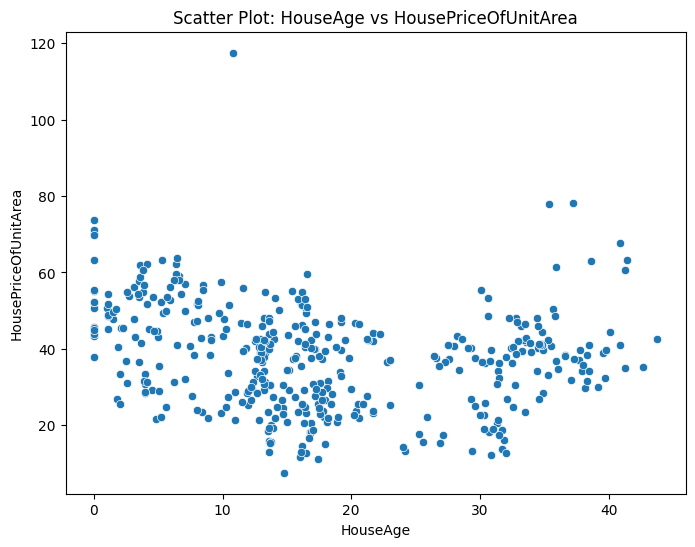

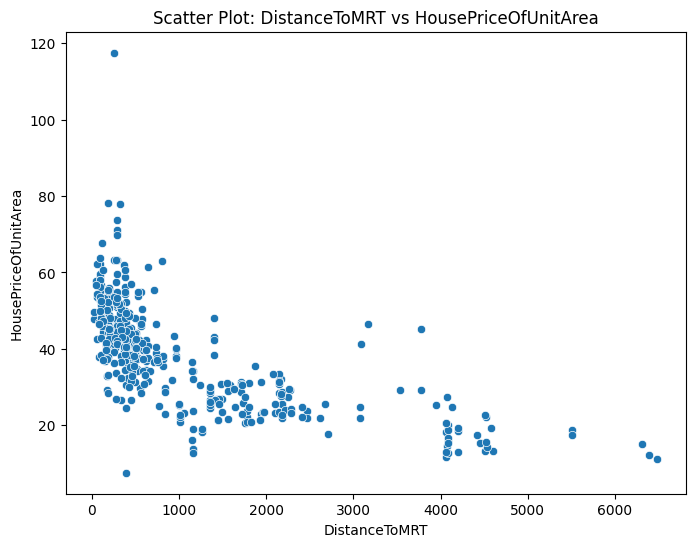

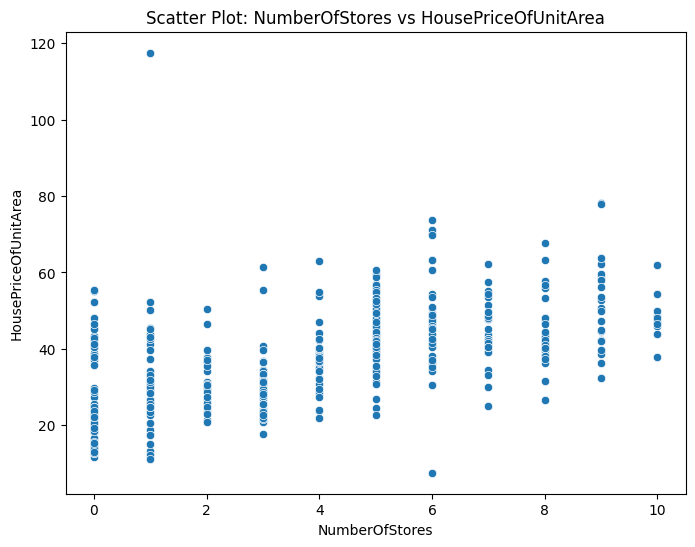

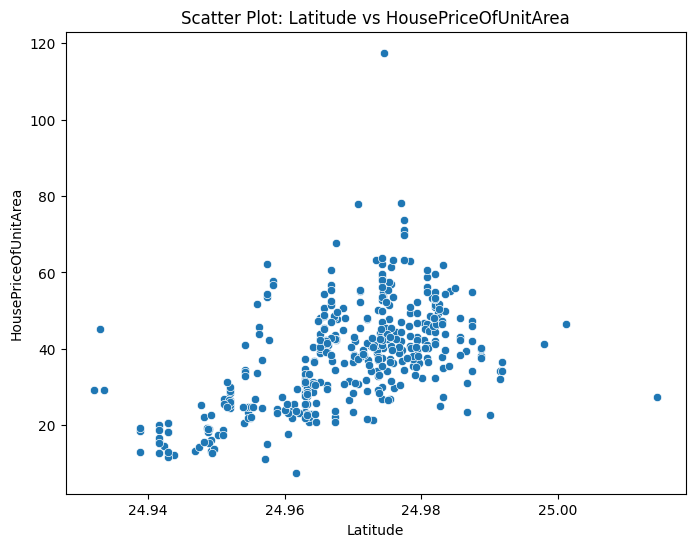

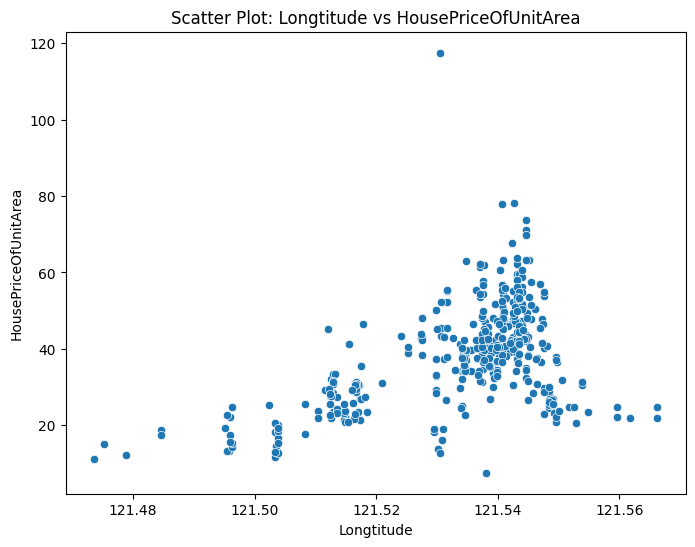

In [ ]:
# Tentukan variabel dependen dan independen
y = 'HousePriceOfUnitArea'
X = ['HouseAge', 'DistanceToMRT', 'NumberOfStores', 'Latitude', 'Longtitude']

# Buat scatter plot untuk setiap variabel independen
for col in X:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df[y])
    plt.title(f'Scatter Plot: {col} vs {y}')
    plt.xlabel(col)
    plt.ylabel(y)
    plt.show()

## Visualisasi Korelasi Antar Nilai Variabel Independen dan Dependen

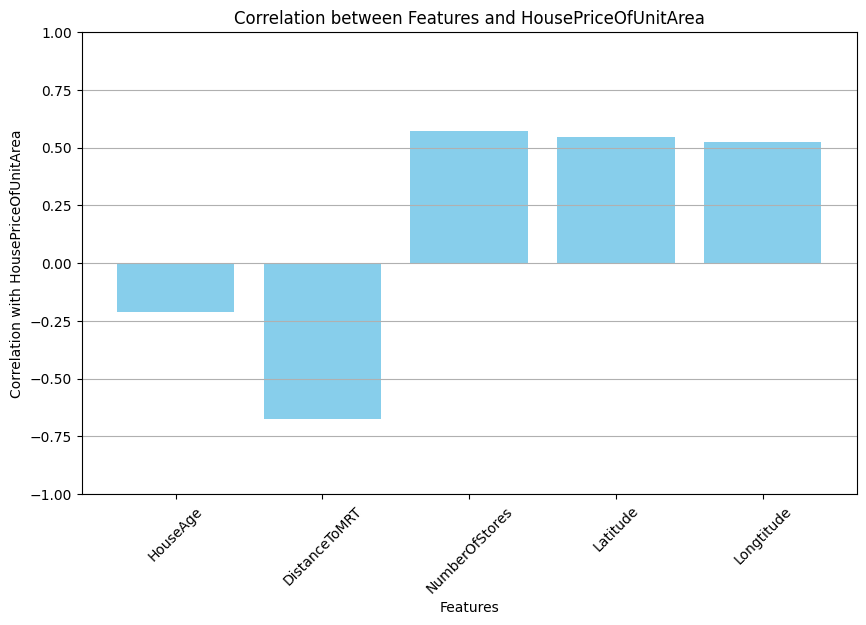

In [ ]:
# Tentukan variabel dependen dan independen
y = df['HousePriceOfUnitArea']
X_columns = ['HouseAge', 'DistanceToMRT', 'NumberOfStores', 'Latitude', 'Longtitude']

# Menghitung korelasi antara setiap variabel independen dengan variabel dependen
correlations = {}
for col in X_columns:
    correlations[col] = df[col].corr(y)

# Mengonversi dictionary ke DataFrame untuk visualisasi
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(correlation_df['Feature'], correlation_df['Correlation'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with HousePriceOfUnitArea')
plt.title('Correlation between Features and HousePriceOfUnitArea')
plt.xticks(rotation=45)
plt.ylim(-1, 1)
plt.grid(axis='y')

# Menampilkan plot
plt.show()

### visualisasi map

In [ ]:
import plotly.express as px # Library visualisasi map

In [ ]:
color_scale = [(0,'orange'),(0,'red')]
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longtitude", color="HousePriceOfUnitArea", zoom=10, height=500, color_continuous_scale=color_scale)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Rumah Termahal

In [ ]:
result = df[df['HousePriceOfUnitArea'] == 117.5]
print(result)

     TransactionDate  HouseAge  DistanceToMRT  NumberOfStores  Latitude  \
270         2013.333      10.8       252.5822               1   24.9746   

     Longtitude  HousePriceOfUnitArea  
270   121.53046                 117.5  


### Rumah Termurah

In [ ]:
termurah = df[df['HousePriceOfUnitArea'] == 7.600000]
print(termurah)

     TransactionDate  HouseAge  DistanceToMRT  NumberOfStores  Latitude  \
113         2013.333      14.8       393.2606               6  24.96172   

     Longtitude  HousePriceOfUnitArea  
113   121.53812                   7.6  


# UJI ASUMSI


In [ ]:
# Definisikan variabel dependen dan independen
y = df['HousePriceOfUnitArea']
X = df[['HouseAge', 'DistanceToMRT', 'NumberOfStores', 'Latitude', 'Longtitude']]

# Tambahkan konstanta ke model
X = sm.add_constant(X)

# Buat model regresi linear berganda
model = sm.OLS(y, X).fit()

## Uji Asumsi Homokedastisitas

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
# Mengambil residual dari model
resid = model.resid

# Uji Breusch-Pagan
bp_test = het_breuschpagan(resid, model.model.exog)
bp_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_results = dict(zip(bp_labels, bp_test))

# Menampilkan hasil uji Breusch-Pagan
print(bp_results)


{'Lagrange multiplier statistic': 4.495597065243559, 'p-value': 0.4804727517635845, 'f-value': 0.895816303548566, 'f p-value': 0.4837711101651472}


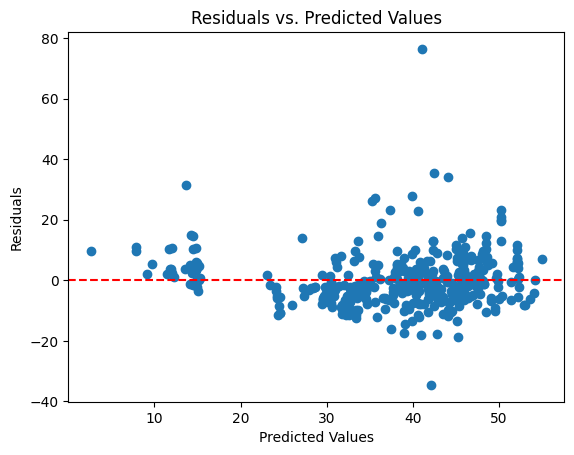

In [ ]:
# Plot residual vs. prediksi
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.show()

In [ ]:
# mengambil residual (sisa kesalahan) dari model regresi yang telah di-fit.
resid = model.resid

#  menggunakan model.model.exog dari model.exog
bp_test = het_breuschpagan(resid, model.model.exog)
bp_labels = ['HouseAge', 'DistanceToMRT', 'NumberOfStores']  # variabel independen
# Cetak tabel hasil uji
print('=' * 50)
print('Uji Breusch-Pagan')
print('=' * 50)
print('Fitur\tLM Statistic\tLM-Test p-value\tF-Statistic')
print('=' * 50)

# Mengakses elemen Bp_test
lm_stat, lm_pval, f_stat, f_pval = bp_test
for i, feature in enumerate(bp_labels):
    print(f'{feature}\t{lm_stat:.4f}\t{lm_pval:.4f}\t{f_stat:.4f}\t{f_pval:.4f}')

print('=' * 50)

Uji Breusch-Pagan
Fitur	LM Statistic	LM-Test p-value	F-Statistic
HouseAge	4.4956	0.4805	0.8958	0.4838
DistanceToMRT	4.4956	0.4805	0.8958	0.4838
NumberOfStores	4.4956	0.4805	0.8958	0.4838


## UJI ASUMSI NORMALITAS


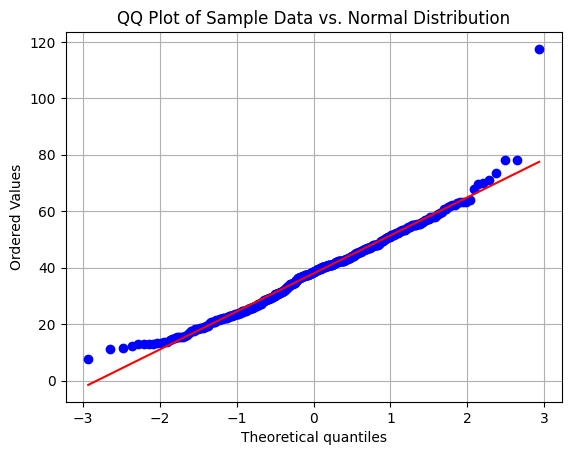

In [ ]:
# Sample data (replace with your actual data)
data = df['HousePriceOfUnitArea']

# Perform QQ plot with normal distribution as reference
stats.probplot(data, dist="norm", plot=plt)
plt.title("QQ Plot of Sample Data vs. Normal Distribution")
plt.grid(True)
plt.show()

## Pengecekan Autokorelasi Variabel

In [ ]:
# Pengecekan Autokorelasi Variabel
durbin_watson = 2.115
batas_toleran = 2
if -batas_toleran <= durbin_watson <= batas_toleran:
    print(f"Tidak terjadi autokorelasi.")
else:
    print(f"Diasumsikan terdjadi autokorelasi.")

Diasumsikan terdjadi autokorelasi.


# PERMODELAN DAN ANALISIS DATA REGRESI LINEAR BERGANDA


<Axes: >

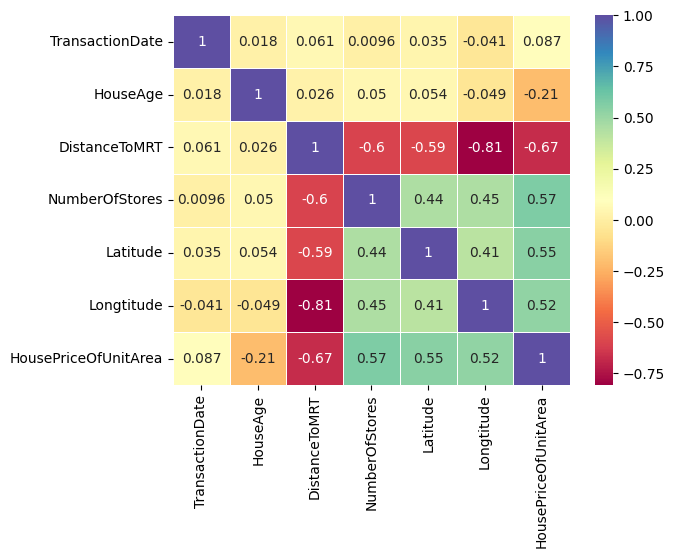

In [ ]:
# Menguji Korelasi Antar Variabel
sns.heatmap(df.corr(), cmap = 'Spectral',annot=True,linewidths=0.5)

## Menghitung Variance Inflation Factor (VIF)

In [ ]:
# Pilih variabel independen
X = df[['HouseAge', 'DistanceToMRT', 'NumberOfStores','Latitude', 'Longtitude']]

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

          Feature           VIF
0        HouseAge  3.470796e+00
1   DistanceToMRT  2.970976e+00
2  NumberOfStores  4.732308e+00
3        Latitude  5.913399e+06
4      Longtitude  5.913114e+06


VIF (Variance Inflation Factor) adalah sebuah metrik yang digunakan dalam analisis regresi untuk mengidentifikasi keberadaan multicollinearity antara variabel-variabel independen. Multicollinearity terjadi ketika dua atau lebih variabel independen dalam model regresi memiliki korelasi yang kuat di antara mereka.


---
Fungsi VIF
1. Mendeteksi Multicollinearity: VIF digunakan untuk mengevaluasi seberapa kuat korelasi antara variabel independen dalam model regresi. Semakin tinggi nilai VIF suatu variabel, semakin tinggi tingkat multicollinearity yang dimilikinya.

2. Pengambilan Keputusan dalam Seleksi Fitur: Dalam analisis regresi, pemahaman tentang multicollinearity dapat membantu dalam pemilihan variabel yang paling relevan dan informatif untuk dimasukkan ke dalam model.

## Memisahkan Data Training dan Data Testing

In [ ]:
# Extract the dependent variable (HousePriceOfUnitArea(Y))
harga_rumah = df['HousePriceOfUnitArea']

# Extract the independent variables (HouseAge(X2), DistanceToMRT(X3), NumberOfStores(X4))
independent_vars = ['HouseAge', 'DistanceToMRT', 'NumberOfStores']
independent_values = df[independent_vars]

## Membuat Regresi Linear dengan Menggunakan Model OLS

In [ ]:
# Add a constant term to the independent variables
independent_values = sm.add_constant(independent_values)

# Create the regression model using OLS (Ordinary Least Squares) method
model = sm.OLS(harga_rumah, independent_values).fit()

# Print the model summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     HousePriceOfUnitArea   R-squared:                       0.541
Model:                              OLS   Adj. R-squared:                  0.538
Method:                   Least Squares   F-statistic:                     161.1
Date:                  Tue, 16 Jul 2024   Prob (F-statistic):           5.44e-69
Time:                          15:20:37   Log-Likelihood:                -1506.5
No. Observations:                   414   AIC:                             3021.
Df Residuals:                       410   BIC:                             3037.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             42.977

## Training & Testing Data

In [ ]:
msk = np.random.rand(len(df))<1
train = df[msk]
test = df[~msk]

## Data Training

In [ ]:
regr = LinearRegression()
train_x = np.asanyarray(train[['HouseAge', 'DistanceToMRT', 'NumberOfStores']])
train_y = np.asarray(train['HousePriceOfUnitArea'])
regr.fit (train_x, train_y)

# Koefisien
print("Koefisien :", regr.coef_)
print("Konstanta :", regr.intercept_)

Koefisien : [-0.25285583 -0.00537913  1.29744248]
Konstanta : 42.97728620606406


## Data Test

In [ ]:
test_x = np.asanyarray(train[['HouseAge', 'DistanceToMRT', 'NumberOfStores']])
test_y = np.asarray(train['HousePriceOfUnitArea'])

In [ ]:
test_y_= regr.predict(test_x)
print("Mean absolute error (MAE): %.2f" % mean_absolute_error(test_y_, test_y))
print("Mean Squared error (MSE): %.2f" % mean_squared_error(test_y_,test_y))
print("Roots Mean Squared error (RMSE): %.2f" % math.sqrt(mean_squared_error(test_y_,test_y)))
print("R2-score: %.2f" % r2_score(test_y_,test_y))

Mean absolute error (MAE): 6.49
Mean Squared error (MSE): 84.76
Roots Mean Squared error (RMSE): 9.21
R2-score: 0.15


# HASIL DAN EVALUASI


EVALUASI MODEL

In [ ]:
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj

# Menampilkan hasil
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)

R-squared: 0.5410632980005723
Adjusted R-squared: 0.5377052245713082


## UJI F

In [ ]:
from scipy.stats import f
alpha = 0.05
df_numerator = 3
df_denominator = 410
F_stat = 161.1
# Calculate F-critical value
f_critical = f.ppf(1 - alpha, df_numerator, df_denominator)
print("F-critical value:", f_critical)
# Menentukan apakah nilai F-statistik diterima atau ditolak
print(f"\nKriteria Penerimaan: Nilai F-statistik antara <= / > F_critic")
if F_stat <= f_critical :
    print(f"Nilai H0 untuk HouseAge diterima.")
else:
    print(f"Nilai H0 untuk HouseAge ditolak.")

F-critical value: 2.6266675078603496

Kriteria Penerimaan: Nilai F-statistik antara <= / > F_critic
Nilai H0 untuk HouseAge ditolak.


## Pengecekan Nilai T Variabel independen

In [ ]:
# Menghitung rata-rata sampel
sample_mean = np.mean(df[['HouseAge', 'DistanceToMRT', 'NumberOfStores']])

# Melakukan uji t satu sampel
t_statistic, p_value = stats.ttest_1samp(df[['HouseAge', 'DistanceToMRT', 'NumberOfStores']], sample_mean)[:2]

# Menentukan derajat kebebasan (degrees of freedom)
df_degrees_of_freedom = len(df[['HouseAge', 'DistanceToMRT', 'NumberOfStores' ]]) - 1

# Menentukan tingkat signifikansi (misalnya 0.05 untuk 95% confidence interval)
alpha = 0.05

# Menghitung nilai t kritis
t_critical = stats.t.ppf(1 - alpha/2, df_degrees_of_freedom)

In [ ]:
# Menampilkan hasil
print(f"p-value: {p_value}")
print(f"Degrees of freedom: {df_degrees_of_freedom}")
print(f"t critical (two-tailed, alpha={alpha}): {t_critical}")


p-value: [0.00000000e+00 7.29048948e-27 0.00000000e+00]
Degrees of freedom: 413
t critical (two-tailed, alpha=0.05): 1.965724566559917


In [ ]:
# Mendapatkan nilai t dari model OLS
t_HouseAge = model.tvalues[1]
t_distancetomrt = model.tvalues[2]
t_numberofstores = model.tvalues[3]

# Memasukkan nilai t kritis
t_kritis = 1.965

# Menampilkan hasil
print(f"Nilai t-statistik untuk HouseAge: {t_HouseAge}")
print(f"Nilai t-statistik untuk DistanceToMRT: {t_distancetomrt}")
print(f"Nilai t-statistik untuk NumberOfStores: {t_numberofstores}")

# Menentukan apakah nilai t-statistik diterima atau ditolak
print(f"\nKriteria Penerimaan: Nilai t-statistik antara -{t_kritis} dan {t_kritis}")

if -t_kritis <= t_HouseAge <= t_kritis:
    print(f"Nilai H0 untuk HouseAge diterima.")
else:
    print(f"Nilai H0 untuk HouseAge ditolak.")

if -t_kritis <= t_distancetomrt <= t_kritis:
    print(f"Nilai H0 untuk DistanceToMRT diterima.")
else:
    print(f"Nilai H0 untuk DistanceToMRT ditolak.")

if -t_kritis <= t_numberofstores <= t_kritis:
    print(f"Nilai H0 untuk NumberOfStores diterima.")
else:
    print(f"Nilai H0 untuk NumberOfStores ditolak.")

Nilai t-statistik untuk HouseAge: -6.304793689555477
Nilai t-statistik untuk DistanceToMRT: -11.87361545666133
Nilai t-statistik untuk NumberOfStores: 6.677871242444705

Kriteria Penerimaan: Nilai t-statistik antara -1.965 dan 1.965
Nilai H0 untuk HouseAge ditolak.
Nilai H0 untuk DistanceToMRT ditolak.
Nilai H0 untuk NumberOfStores ditolak.


## Prediksi Harga rumah


In [ ]:
# Konstanta dan koefisien
konstanta = 42.977
koefisien_x1 = -0.253
koefisien_x2 = -0.005
koefisien_x3 = 1.297

# Input umur rumah
umur_rumah = float(input("Masukkan umur rumah (tahun): "))

# Input jarak ke stasiun MRT
jarak_mrt = float(input("Masukkan jarak ke stasiun MRT (meter): "))

# Input jumlah toko
jumlah_toko = float(input("Masukkan jumlah toko yang diinginkan: "))

# Hitung harga rumah
harga_rumah = konstanta + (koefisien_x1 * umur_rumah) + (koefisien_x2 * jarak_mrt) + (koefisien_x3 * jumlah_toko)

# Tampilkan hasil
print("Harga rumah (Dalam JUTA): ", harga_rumah, "Ping (Dolar Taiwan)")